# ⛏️ Zyfra Gold Predictor: Optimizando la Extracción de Oro 🪙✨

# 📋 Descripción:
Este proyecto desarrolla un modelo de machine learning para predecir la cantidad de oro extraído del mineral, a partir de datos de extracción y purificación, con el fin de optimizar la producción y reducir procesos no rentables en la industria pesada.

# 🎯 Objetivo general
Diseñar, entrenar y evaluar un modelo predictivo que, utilizando datos reales de extracción y purificación, permita estimar con precisión la cantidad de oro obtenida, contribuyendo a mejorar la eficiencia y la rentabilidad del proceso productivo en Zyfra.

Importar bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

In [2]:
import os
print(os.path.exists('C:/ruta_completa/datasets/gold_recovery_train.csv'))

False


## Importar Archivos

### Preparar los datos

Leer los dataset y guardar en las variables respectivas

In [3]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv') 
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

Obtener información general sobre cada Dataset

In [4]:
print(df_train.shape)
df_train.head()

(16860, 87)


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [6]:
print(df_test.shape)
df_test.head()

(5856, 53)


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [8]:
print(df_full.shape)
df_full.head()

(22716, 87)


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [9]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


Calcular y mostrar el porcentaje de los conjuntos de entrenamiento y prueba

In [10]:
print('Porcentaje conjunto de entrenamiento:', round(len(df_train)*100/len(df_full), 2))
print('Porcentaje conjunto de prueba:', round(len(df_test)*100/len(df_full),2))

Porcentaje conjunto de entrenamiento: 74.22
Porcentaje conjunto de prueba: 25.78


### Análisis Preliminar:

Los datos se estrcuturan en tres conjuntos: entrenamiento, prueba y un conjunto completo, lo cuales contienen información sobre el proceso de purificación de metales, incluyendo concentraciones de metales (Au, Ag, Pb), tamaños de partículas, y parámetros del proceso.
La mayoría de las columnas son de tipo float64, lo que indica datos numéricos continuos, con una columna de tipo object que representa la fecha.

Hay una cantidad significativa de valores nulos en varias columnas en todos los conjuntos de datos.
Las columnas relacionadas con las concentraciones de metales, los parámetros del proceso y las recuperaciones tienen valores nulos. La presencia de valores nulos requerirá una estrategia de tratamiento adecuada (imputación o eliminación) para evitar sesgos en el análisis y modelado.

El análisis de las concentraciones de metales y la recuperación puede proporcionar información valiosa sobre la eficiencia del proceso.La distribución del tamaño de las partículas debe ser monitorizada para asegurar que el modelo sea evaluado correctamente.

Volumen de Datos:

El conjunto completo es el más grande, seguido del conjunto de entrenamiento y luego el conjunto de prueba.
El conjunto de entrenamiento representa aproximadamente el 74.22% de los datos totales, mientras que el conjunto de prueba representa el 25.78%.

### Cálculo Recuperación

Comprobar que el cálculo de la recuperación sea correcto

In [11]:
# Values
# C : rougher.output.concentrate_au
# F : rougher.input.feed_au
# T: rougher.output.tail_au

In [12]:
def recovery_calculation(df, stage = 'rougher'):
    if stage == 'rougher':
        C =  df['rougher.output.concentrate_au']
        F =  df['rougher.input.feed_au']
        T =  df['rougher.output.tail_au']
    
    elif stage == 'final':
        C = df['final.output.concentrate_au']
        F = df['rougher.output.concentrate_au']
        T = df['final.output.tail_au']
    
    else:
        print('Indicar etapa adecuada (rougher o final)')
        return np.nan    
    
    numerator = C*(F-T)
    denominator = F*(C-T)
    recovery = 100*(numerator/denominator)
    
    return recovery

In [13]:
rougher_data = df_train[['rougher.output.concentrate_au',
                         'rougher.input.feed_au',
                         'rougher.output.tail_au', 
                         'rougher.output.recovery']].dropna()
rougher_recovery = recovery_calculation(rougher_data, 'rougher')

In [14]:
rougher_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 14287, dtype: float64

In [15]:
rougher_data.shape

(14287, 4)

### Caracteristicas no disponibles

Analizar las características no disponibles en el conjunto de prueba.

In [16]:
columnas_full = df_full.columns.values
columnas_test = df_test.columns.values

missed_columns = set(columnas_full) - set(columnas_test)
missed_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

#### Hallazgos:

¿Cuáles son estos parámetros?

Los datos representan parámetros clave en un proceso de extracción y purificación de metales, probablemente en una mina. Describen las concentraciones de varios metales y sustancias químicas en diferentes etapas del proceso, así como cálculos y recuperaciones. 

¿Cuál es su tipo?

En términos del tipo de datos, y según el contexto en el que suelen aparecer, estos parámetros son generalmente de tipo:

Numérico Continuo:
 La gran mayoría de estos parámetros son numéricos y continuos, lo que significa que representan mediciones.
Las concentraciones de metales (plata - Ag en este caso) se miden en valores que pueden variar continuamente. No son valores discretos o categorías fijas.
Estos valores representan cantidades que pueden tener decimales y se ubican en un espectro continuo.

### Preprocesamiento de datos

In [17]:
df_train.duplicated().sum()

0

In [18]:
df_train.isna().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [19]:
df_test.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [20]:
# Rellenar valores ausentes
df_train = df_train.fillna(method = 'ffill')
df_test = df_test.fillna(method = 'ffill')

In [21]:
df_test = df_test.merge(df_full[['date','rougher.output.recovery','final.output.recovery']],
                        how = 'left', on = 'date')
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


In [22]:
df_train = df_train[df_test.columns]
df_train.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,68.347543
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,66.927016


In [23]:
print(df_train.columns)  # Ver columnas disponibles en df_train
print(df_test.columns)   # Ver columnas disponibles en df_test

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [24]:
df_train[df_test.columns]

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,68.347543
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,66.927016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,...,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,89.574376,73.755150
16856,2018-08-18 07:59:59,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,...,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,87.724007,69.049291
16857,2018-08-18 08:59:59,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,...,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,88.890579,67.002189
16858,2018-08-18 09:59:59,98.880538,7.984164,6.50,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126,65.523246


In [25]:
print(set(df_test.columns) - set(df_train.columns))  # Columnas en df_test que no están en df_train
print(set(df_train.columns) - set(df_test.columns))  # Columnas en df_train que no están en df_test

set()
set()


### Hallazgos:

El proceso anterior tiene como objetivo principal preparar y limpiar los datos para un análisis o modelado posterior. 

Limpieza de Datos: Identificar y tratar valores nulos y duplicados.
Combinar DataFrames para agregar información relevante.
Alinear Columnas: Asegura que los DataFrames de entrenamiento y prueba tengan las mismas columnas para el modelado.
Comparar Columnas: Identificar las diferencias en las columnas entre los conjuntos de datos.
Este proceso es crucial para preparar los datos para el análisis y el modelado, asegurando que los data set sean consistentes y limpios.

El objetivo general es preparar los datos para el análisis y el modelado, asegurando que estén limpios, completos y consistentes. Esto implica:

Manejar valores faltantes y duplicados.
Alinear los conjuntos de datos para que tengan las mismas columnas.
Agregar información relevante de otras fuentes de datos.
Estos pasos son esenciales para obtener resultados confiables y precisos del análisis y el modelado.

## Análisis de Datos

# Oro (Au)
- rougher.input.feed_au
- rougher.output.concentrate_au
- primary_cleaner.output.concentrate_au
- final.output.concentrate_au

# Plata (Ag)
- rougher.input.feed_ag
- rougher.output.concentrate_ag
- primary_cleaner.output.concentrate_ag
- final.output.concentrate_ag


# Plomo (Pb)

- rougher.input.feed_pb
- rougher.output.concentrate_pb
- primary_cleaner.output.concentrate_pb
- final.output.concentrate_pb

# Partículas de alimentación

En los set de train y test:
- rougher.input.feed_size
- primary_cleaner.input.feed_size


# Concentraciones totales

Sumar para Au, Ag, Pb y sol las columnas anteriormente mencionadas para generar columnas de "total_concentration" y generar los gráficos

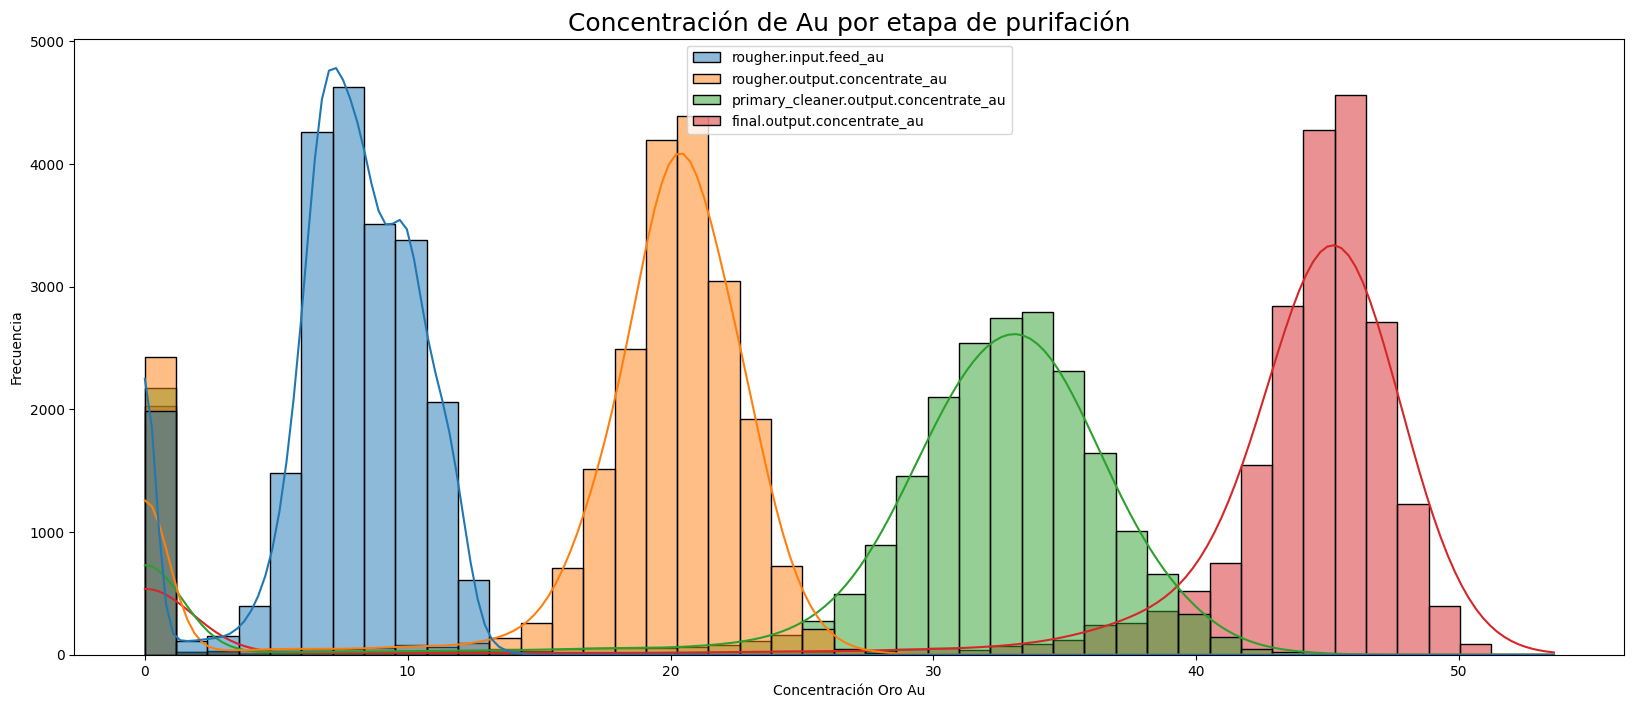

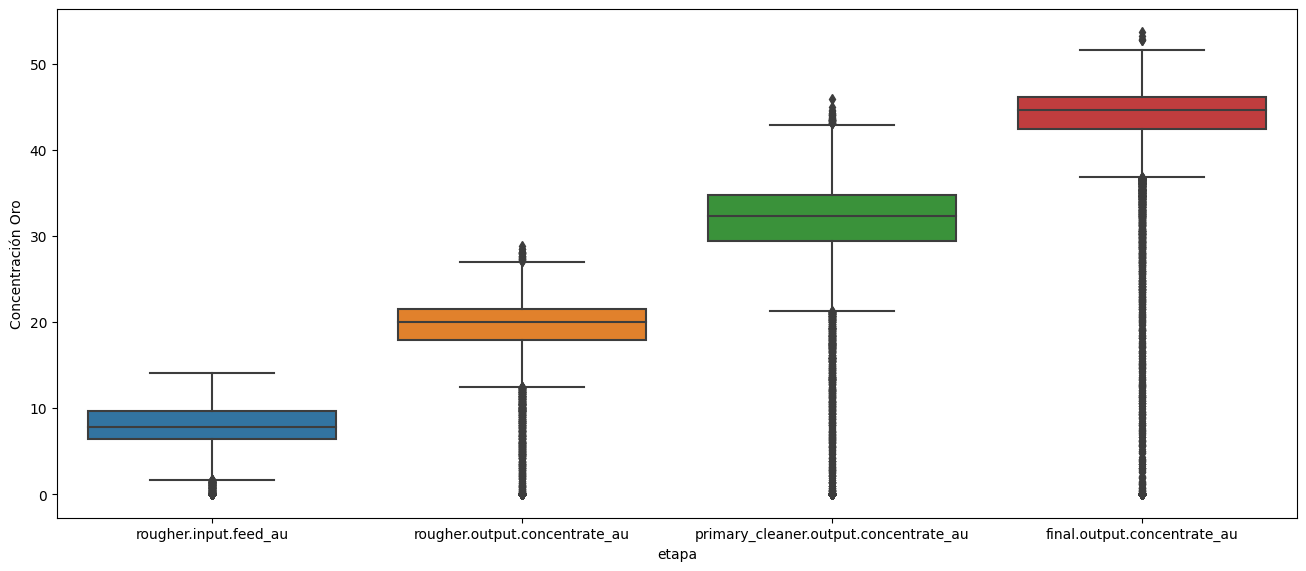

In [26]:
au_columns = ['rougher.input.feed_au',
              'rougher.output.concentrate_au',
              'primary_cleaner.output.concentrate_au',
              'final.output.concentrate_au']

concentrate_au = df_full[au_columns]

plt.figure(figsize = (20,8))
sns.histplot(concentrate_au, kde = True)
plt.xlabel('Concentración Oro Au')
plt.ylabel('Frecuencia')
plt.title('Concentración de Au por etapa de purifación', fontsize = 18)
plt.show()

plt.figure(figsize=(16,6.6))
sns.boxplot(data=concentrate_au)#, showfliers = False)
plt.xlabel('etapa')
plt.ylabel('Concentración Oro')
plt.show()

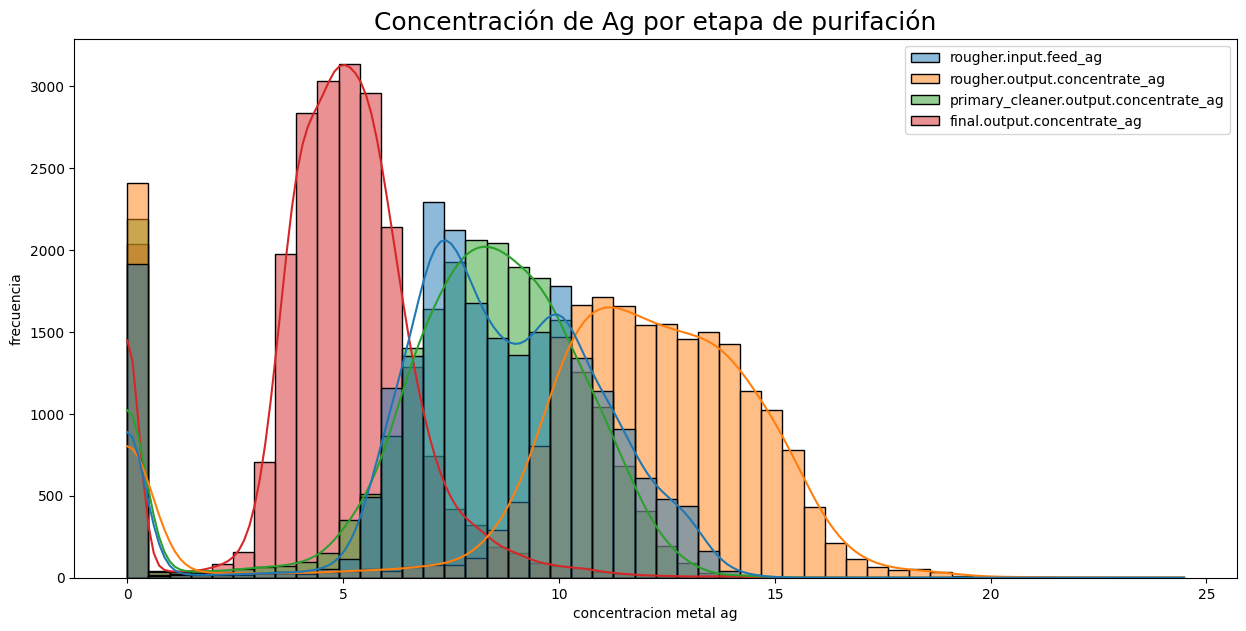

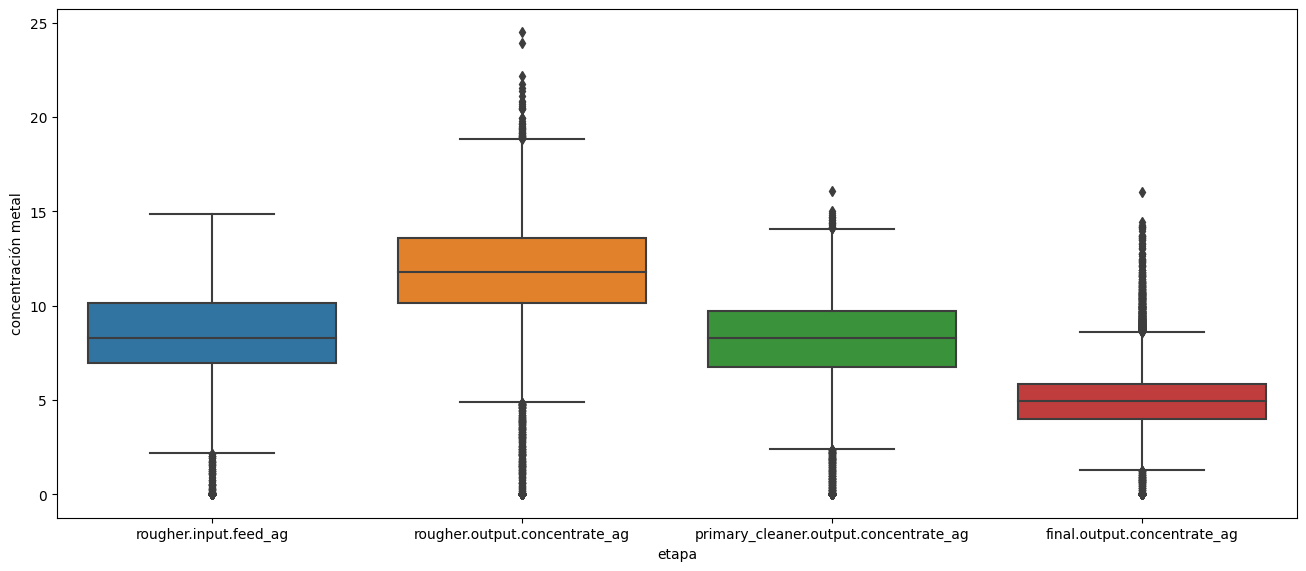

In [27]:
ag_columns = ['rougher.input.feed_ag',
              'rougher.output.concentrate_ag',
              'primary_cleaner.output.concentrate_ag',
              'final.output.concentrate_ag']

concentrate_ag = df_full[ag_columns]

plt.figure(figsize = (15,7))
sns.histplot(concentrate_ag, kde=True, bins=50)
plt.xlabel('concentracion metal ag')
plt.ylabel('frecuencia')
plt.title('Concentración de Ag por etapa de purifación', fontsize = 18)
plt.show()

plt.figure(figsize=(16, 6.6))

sns.boxplot(data=concentrate_ag)#, showfliers = False)
plt.xlabel('etapa')
plt.ylabel('concentración metal')
plt.show()

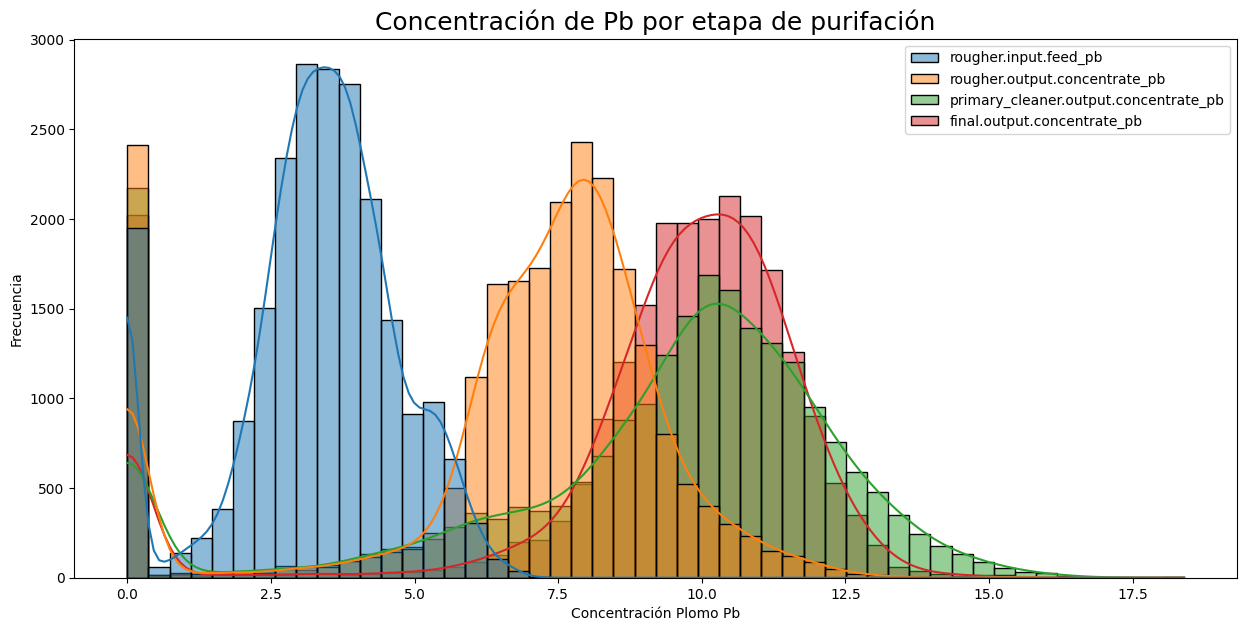

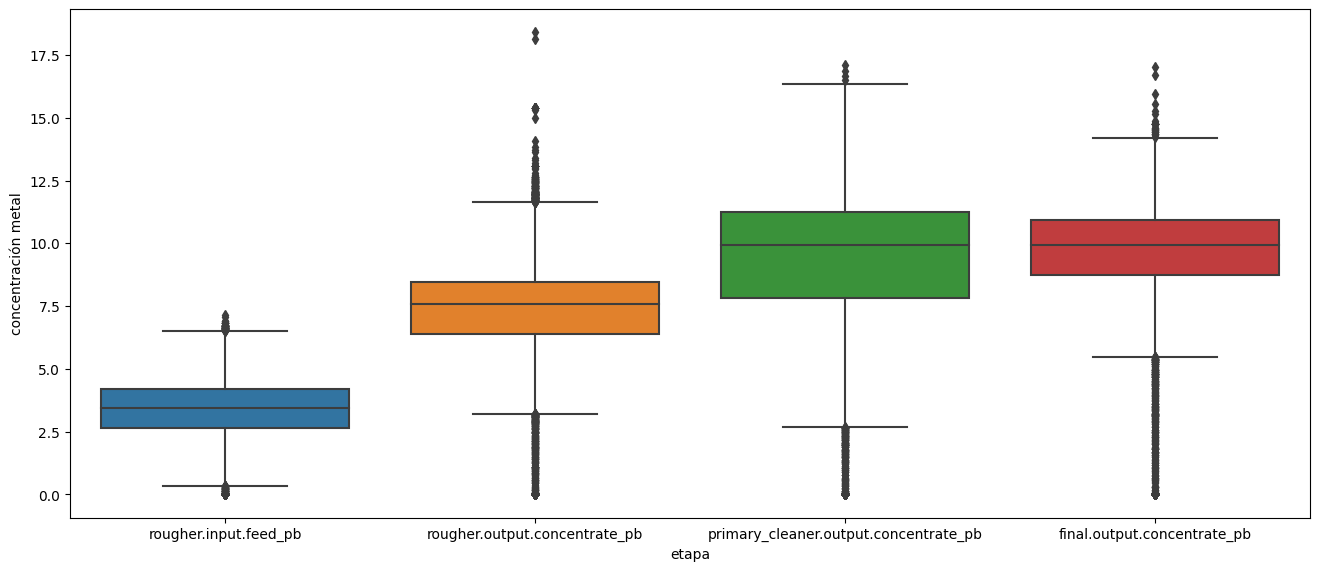

In [28]:
pb_columns = ['rougher.input.feed_pb',
              'rougher.output.concentrate_pb',
              'primary_cleaner.output.concentrate_pb',
              'final.output.concentrate_pb']

concentrate_pb = df_full[pb_columns]

plt.figure(figsize = (15,7))
sns.histplot(concentrate_pb, kde=True, bins=50)
plt.xlabel('Concentración Plomo Pb')
plt.ylabel('Frecuencia')
plt.title('Concentración de Pb por etapa de purifación', fontsize = 18)
plt.show()

plt.figure(figsize=(16, 6.6))

sns.boxplot(data=concentrate_pb)#, showfliers = False)
plt.xlabel('etapa')
plt.ylabel('concentración metal')
plt.show()

Comparación del tamaño de partículas en entrada (train vs test) usando KDE.

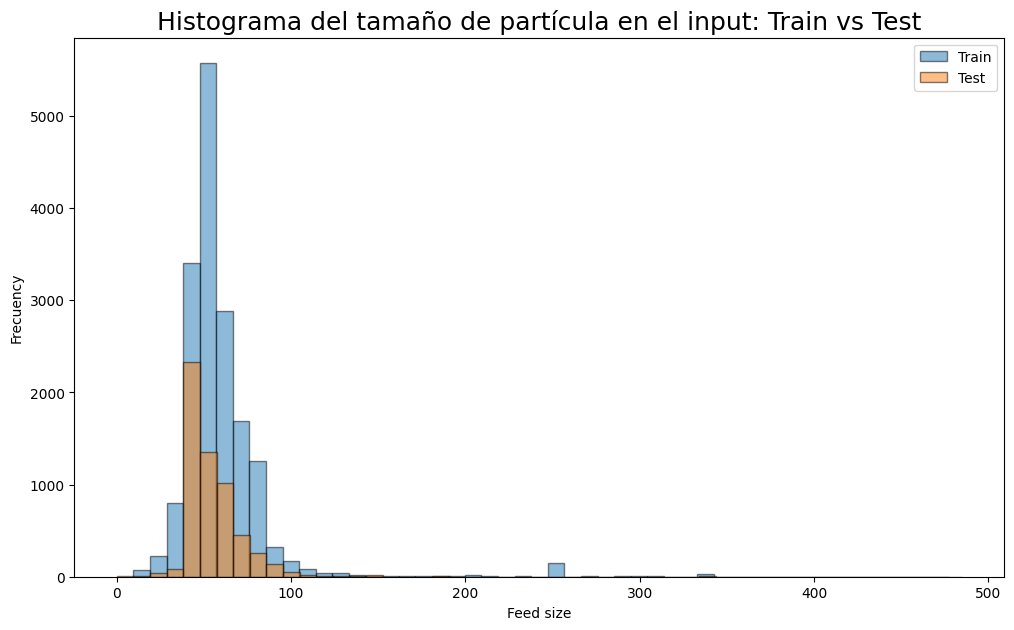

In [29]:
plt.figure(figsize=(12, 7))

plt.hist(df_train['rougher.input.feed_size'], bins=50, alpha=0.5, label='Train', edgecolor='black')
plt.hist(df_test['rougher.input.feed_size'], bins=50, alpha=0.5, label='Test', edgecolor='black')

plt.xlabel('Feed size')
plt.ylabel('Frecuency')
plt.title('Histograma del tamaño de partícula en el input: Train vs Test', fontsize=18)
plt.legend()
plt.show()

Concentración total de metales (Au, Ag, Pb) y sol para cada una de las tres etapas:

* rougher.input.feed

* rougher.output.concentrate

* final.output.concentrate

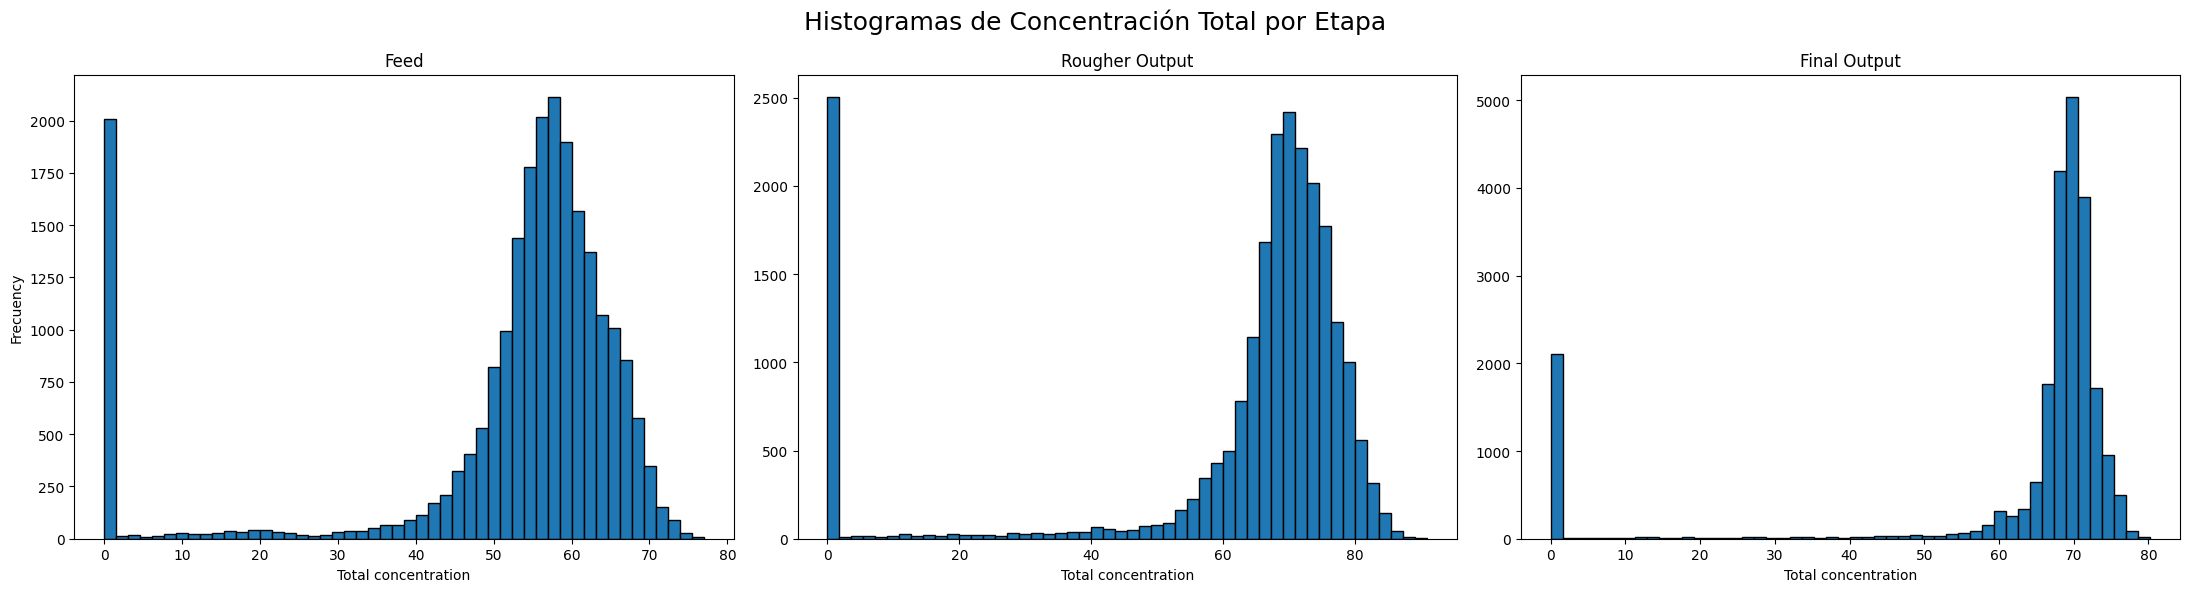

In [30]:
# Crear columnas sumadas para cada etapa
df_full['feed_total'] = df_full[[f'rougher.input.feed_{el}' for el in ['au', 'ag', 'pb', 'sol']]].sum(axis=1)
df_full['rougher_total'] = df_full[[f'rougher.output.concentrate_{el}' for el in ['au', 'ag', 'pb', 'sol']]].sum(axis=1)
df_full['final_total'] = df_full[[f'final.output.concentrate_{el}' for el in ['au', 'ag', 'pb', 'sol']]].sum(axis=1)

plt.figure(figsize=(22, 6))

# Histograma 1 - Feed
plt.subplot(1, 3, 1)
plt.hist(df_full['feed_total'], bins=50, edgecolor='black')
plt.title('Feed')
plt.xlabel('Total concentration')
plt.ylabel('Frecuency')

# Histograma 2 - Rougher Output
plt.subplot(1, 3, 2)
plt.hist(df_full['rougher_total'], bins=50, edgecolor='black')
plt.title('Rougher Output')
plt.xlabel('Total concentration')

# Histograma 3 - Final Output
plt.subplot(1, 3, 3)
plt.hist(df_full['final_total'], bins=50, edgecolor='black')
plt.title('Final Output')
plt.xlabel('Total concentration')

plt.suptitle('Histogramas de Concentración Total por Etapa', fontsize=18)
plt.tight_layout()
plt.show()

In [31]:
def remove_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.between(lower, upper)

# Aplicar a las columnas de concentración total
mask = (
    remove_outliers_iqr(df_full['feed_total']) &
    remove_outliers_iqr(df_full['rougher_total']) &
    remove_outliers_iqr(df_full['final_total'])
)

### Conclusiones:

Histogramas y Boxplots:
En los histogramas, se observa que las distribuciones de los tres metales (Au, Ag, Pb) tienen colas largas, lo que indica la presencia de valores atípicos.

Los boxplots confirman la presencia de valores atípicos, especialmente en las etapas finales de purificación. Estos valores atípicos se representan como puntos fuera de los bigotes de los boxplots.

Los outliers podrían representar variaciones reales en el proceso de purificación, errores de medición o eventos inusuales.

¿Merece la Pena Eliminar los Outliers?

Impacto en el Análisis:

Los outliers pueden distorsionar las estadísticas descriptivas (media, desviación estándar) y afectar el rendimiento de los modelos de machine learning.
Si los valores atípicos son errores de medición, eliminarlos mejorará la precisión del análisis.

Impacto en el Modelo:

Dependiendo del modelo, algunos modelos son muy susceptibles a los valores atípicos, y otros modelos son mas robustos a estos.
Si el modelo es muy susceptible a los valores atípicos, se debe de considerar eliminarlos.

Distribución del tamaño de partícula en el input:

Es generalmente similar entre los conjuntos de Train y Test, con la mayoría de las partículas concentradas en un rango pequeño. Esto es positivo para el modelado, ya que el modelo entrenado con los datos de Train debería ser aplicable a los datos de Test con características de entrada similares en cuanto al tamaño de partícula. 

Análisis de Histogramas de Concentración Total:
A medida que el material avanza a través de las etapas de purificación (Feed -> Rougher Output -> Final Output), la distribución de la concentración total se desplaza progresivamente hacia valores más altos.

Los gráficos ilustran  la efectividad del proceso de purificación para aumentar la concentración total del material deseado. El proceso logra eliminar el material de baja concentración y concentrar el material de interés en etapas sucesivas, resultando en un producto final con una concentración total alta y relativamente uniforme.
La dispersión de la concentración total parece disminuir, sugiriendo un producto final más homogéneo en términos de concentración total.

## Construir el modelo

### Función para calcular el valor final de sMAPE.

In [32]:
target = ['rougher.output.recovery', 'final.output.recovery']

In [33]:
y_train = df_train[target].reset_index(drop = True)
x_train = df_train.drop(target, axis = 1)
x_train = x_train.drop(['date'], axis = 1)

In [34]:
%%time
def compute_smape(y, y_pred):
    n = len(y)
    real = abs(y)
    pred = abs(y_pred)
    diff = abs(y - y_pred)
    smape =  (1/n)*np.sum(diff /((real + pred)/2))*100
    return smape

def smape_final(y, y_pred):
    
    y_rougher = y.iloc[:,0]
    y_pred_rougher = y_pred[:,0]
    
    y_final = y.iloc[:,1]
    y_pred_final = y_pred[:,1]
    
    smape_rougher = compute_smape(y_rougher, y_pred_rougher)
    smape_final = compute_smape(y_final, y_pred_final)
    
    return (0.25*smape_rougher + 0.75*smape_final)

smape_scorer = make_scorer(smape_final)

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 16.2 µs


In [35]:
lr_model = LinearRegression()

lr_score = cross_val_score(lr_model, x_train, y_train, scoring=smape_scorer, cv = 5)

lr_final_score = lr_score.mean()

print('Puntajes sMAPE para cada iteración:', lr_score)
print('Modelo de Regresión Lineal | sMAPE = {:.6f}'.format(lr_final_score))

Puntajes sMAPE para cada iteración: [17.86800384 13.05000993 15.84610413 20.683037   17.39571145]
Modelo de Regresión Lineal | sMAPE = 16.968573


### Entrenar diferentes modelos

Eligir el mejor modelo y evaluar aplicando la validación cruzada. 

In [36]:
# Función para limpiar datos
def clean_data(df):
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    return df

def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2

    # Ignorar warnings de división inválida temporalmente
    with np.errstate(divide='ignore', invalid='ignore'):
        smape_values = np.where(denominator == 0, 0, numerator / denominator)

    return np.mean(smape_values) * 100

# Función para entrenar y evaluar modelos con validación cruzada usando SMAPE
def train_and_evaluate_models(df_train, target, cv=5):
    # Limpiar datos
    df_train = clean_data(df_train)
    
    # Separar variables objetivo y características
    y_train = df_train[target].reset_index(drop=True)
    x_train = df_train.drop(target + ['date'], axis=1)
    
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    
    # Modelos a entrenar
    models = {
        "RandomForest": MultiOutputRegressor(RandomForestRegressor(max_depth=12, n_estimators=200, random_state=54321)),
        "LinearRegression": MultiOutputRegressor(LinearRegression()),
        "DecisionTree": MultiOutputRegressor(DecisionTreeRegressor(max_depth=12, random_state=54321))
    }
    
    best_model = None
    best_smape = float('inf')
    best_model_name = None
    
    # Evaluar modelos con SMAPE usando cross_val_predict
    for model_name, model in models.items():
        y_pred_cv = cross_val_predict(model, x_train_scaled, y_train, cv=cv)
        smape_cv = smape(y_train.values, y_pred_cv)
        
        print(f"Modelo: {model_name} | SMAPE promedio: {smape_cv:.2f}%")
        
        if smape_cv < best_smape:
            best_smape = smape_cv
            best_model = model
            best_model_name = model_name
    
    print(f"Mejor modelo: {best_model_name} con SMAPE promedio: {best_smape:.2f}%")
    
    # Entrenar el mejor modelo con todos los datos de entrenamiento
    best_model.fit(x_train_scaled, y_train)
    
    return best_model, scaler

# Evaluar el mejor modelo en el conjunto de prueba
def evaluate_model(best_model, scaler, df_test, target):
    df_test = clean_data(df_test)
    
    y_test = df_test[target].reset_index(drop=True)
    x_test = df_test.drop(target + ['date'], axis=1)
    x_test_scaled = scaler.transform(x_test)
    
    y_pred = best_model.predict(x_test_scaled)
    smape_value = smape(y_test.values, y_pred)
    
    print(f"Evaluación en conjunto de prueba:")
    print(f"SMAPE: {smape_value:.2f}%")
    
    return smape_value

# Variables objetivo
target = ['rougher.output.recovery', 'final.output.recovery']

# Entrenar y obtener el mejor modelo y escalador
best_model, scaler = train_and_evaluate_models(df_train, target)

# Evaluar el modelo en la muestra de prueba
evaluate_model(best_model, scaler, df_test, target)

Modelo: RandomForest | SMAPE promedio: 16.22%
Modelo: LinearRegression | SMAPE promedio: 18.21%
Modelo: DecisionTree | SMAPE promedio: 23.06%
Mejor modelo: RandomForest con SMAPE promedio: 16.22%
Evaluación en conjunto de prueba:
SMAPE: 11.03%


11.030864572492911

### Análisis de Resultados:

Regresión Lineal (evaluada por iteración)

Se obtuvo un SMAPE promedio de 16.97% con valores individuales entre 13.05% y 20.68%.

Esta variabilidad indica que el modelo puede ser sensible a la partición de los datos, aunque se mantiene relativamente estable dentro de un rango aceptable.

Comparación entre Modelos

RandomForest fue el mejor modelo, con un SMAPE promedio de 16.22%, superando ligeramente al promedio del modelo lineal.

LinearRegression en la comparación general obtuvo un SMAPE de 18.21%, más alto que el obtenido al evaluarlo manualmente, lo que podría indicar diferencias en cómo se ejecutaron ambas pruebas.

DecisionTree presentó el peor desempeño con un SMAPE de 23.06%, lo que sugiere que su simplicidad no logra capturar bien la complejidad de las relaciones entre variables.

Evaluación en el conjunto de prueba

El modelo RandomForest alcanzó un SMAPE de 11.03% en la prueba final, lo cual representa un muy buen desempeño en datos no vistos y una mejora clara frente a los resultados de validación cruzada.

Consideración:
El modelo RandomForest es el más robusto y preciso, con el menor error relativo tanto en validación cruzada como en prueba. Aunque la regresión lineal muestra un desempeño aceptable, su variabilidad y menor precisión la hacen menos recomendable. El SMAPE confirma que los datos son predecibles, y que el modelo RandomForest generaliza eficazmente.

### Conclusión sobre los ajustes realizados en el proyecto:

* Eliminación de outliers

Permitió identificar y remover valores extremos en las concentraciones de metales mejoró la calidad del conjunto de datos. Esto redujo el ruido y sesgos en el entrenamiento, lo que se reflejó en métricas de error más bajas y modelos más estables.

* Uso de SMAPE como función de error

Elegir SMAPE como métrica principal me permitió evaluar el rendimiento de los modelos en términos relativos, lo cual me permitió una visión más realista del error cometido, especialmente cuando los valores reales son bajos.

* Comparación del tamaño de partículas entre train y test (KDE/Histograma)

Este análisis ayudó a verificar que la distribución de los datos de entrada sea más consistente entre el conjunto de entrenamiento y el de prueba, asegurando que el modelo no se entrene bajo condiciones distintas a las que enfrentará al predecir.

* Histogramas por etapa (suma de concentraciones de Au, Ag, Pb y Sol)

La visualización de la suma total de metales en cada etapa (input, rougher output, final output) me permitió entender mejor la distribución global del material tratado y detectar comportamientos atípicos o desequilibrios entre etapas. Esto fue clave para justificar la limpieza de datos y para interpretar el proceso metalúrgico en su conjunto.